In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_hub as hub

In [2]:
import tensorflow_text as text

In [3]:
# Download and add your BERT Model
bert = r"D:\BERT\bert"
# Download and add your Preprocess Model
preprocessor = r"D:\BERT\preprocess"

In [4]:
encoder = hub.KerasLayer(bert)

In [5]:
preprocess = hub.KerasLayer(preprocessor)

In [6]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

In [7]:
preprocessed_text = preprocess(text_input)

In [8]:
outputs = encoder(preprocessed_text)

In [ ]:
dense_1 = tf.keras.layers.Dense(1000, name="dense_1")(outputs['pooled_output'])

In [ ]:
dropout_1 = tf.keras.layers.Dropout(0.4, name="dropout_1")(dense_1)

In [ ]:
dense_2 = tf.keras.layers.Dense(250, name="dense_1")(dropout_1)

In [ ]:
dropout_2 = tf.keras.layers.Dropout(0.4, name="dropout_1")(dense_2)

In [10]:
output = tf.keras.layers.Dense(3, activation='softmax', name="output")(dropout_2)

In [11]:
model = tf.keras.Model(inputs=[text_input], outputs = [output])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
!pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -------------------------------------- 278.7/278.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=f8718ea2ba52bb7025877646a1090fbac169a43ed96db98cbe8112ebe6145abc
  Stored in directory: c:\users\91997\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [18]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
import pandas as pd
sentiment_df = pd.read_excel("./preprocessed_final_1.xlsx", engine="openpyxl")

In [48]:
def function_1(x):
    if x == "Positive":
        return 2
    elif x == "Negative":
        return 0
    return 1

In [49]:
sentiment_df['type_0'] = sentiment_df['type'].apply(lambda x: function_1(x))

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = sentiment_df['preprocessed_text']
y = sentiment_df['type_0']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [53]:
model.fit(X_train, y_train)

111/111 [==============================] - 511s 5s/step - loss: 0.3093 - accuracy: 0.9129


In [54]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 122s 4s/step - loss: 0.2136 - accuracy: 0.9424


[0.21355034410953522, 0.9423728585243225]

In [64]:
y_train.value_counts().values

array([3336,  199,    3], dtype=int64)

In [70]:
y_test

207     0
2879    0
2470    0
1833    0
398     0
       ..
1328    0
222     0
280     0
1479    0
1369    0
Name: type_0, Length: 885, dtype: int64

C:\Users\91997\AppData\Local\Temp\ipykernel_3900\2299180340.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['red', 'blue', 'green'])


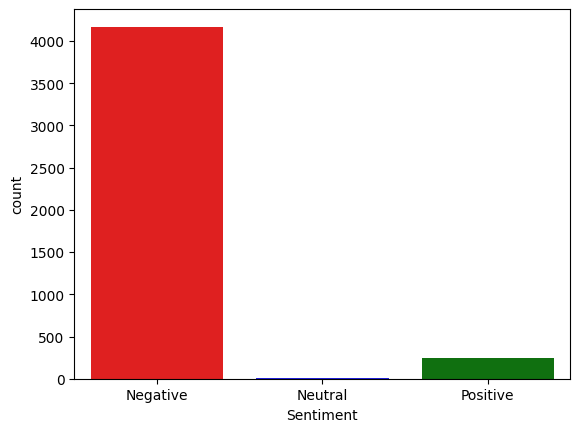

In [80]:
sns.countplot(x=y, palette=['red', 'blue', 'green'])
plt.xticks([0, 1, 2], ["Negative", "Neutral", "Positive"])
plt.xlabel("Sentiment")
plt.savefig("sentiment_predict.png", bbox_inches="tight")

In [82]:
y_pred = model.predict(X_test)

28/28 [==============================] - 208s 7s/step


In [83]:
from sklearn.metrics import classification_report

In [85]:
y_test

207     0
2879    0
2470    0
1833    0
398     0
       ..
1328    0
222     0
280     0
1479    0
1369    0
Name: type_0, Length: 885, dtype: int64

In [87]:
y_pred_vals = [np.argmax(y1) for y1 in y_pred]

In [88]:
y_pred_vals

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
